In [1]:
# %load src/header.py
'''LOAD'''
# %load /Users/rokushou/Desktop/header.py
'''GENERAL'''
import os
#import time
#import timeit
#import warnings
#warnings.simplefilter('ignore')
import random
import collections
#import secrets
import math
import itertools
'''DATA'''
import numpy as np
import pandas as pd
# import databricks.koalas as ks
'''MONGO'''
#from pymongo import MongoClient
'''PLOT'''
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')
font = {'size':16}
import seaborn as sns
'''SCIPY/STATS'''
#import scipy.stats as scs
# from scipy.optimize import nnls
#import statsmodels.api as sm
'''SCIKIT LEARN'''
#from sklearn.datasets import make_classification, load_iris, load_boston, load_digits
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, r2_score, mean_squared_error, classification_report, make_scorer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
#from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier, AdaBoostRegressor, AdaBoostClassifier
# from sklearn.decomposition import PCA, NMF
from sklearn.cluster import KMeans
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
'''TENSORFLOW'''
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.preprocessing import text
from tensorflow.keras import utils
'''NLTK'''
#import nltk
#import unicodedata
#import string
#from nltk.corpus import stopwords
#from nltk.tokenize import sent_tokenize, word_tokenize
#from nltk.stem.porter import PorterStemmer
#from nltk.stem.snowball import SnowballStemmer
#from nltk.stem.wordnet import WordNetLemmatizer
'''NETWORK'''
# import networkx as nx
# import nxpd
# import community as comm
'''FUNCTIONS'''
nrange = lambda x : itertools.repeat(None, x)
def argpsort(a, k):
    return np.argpartition(a, range(k))[:k]
def arghsort(a, k):
    b = np.argpartition(a, k)[:k]
    return b[np.argsort(a[b])]
'''PALETTE'''
t = 'setsuna'
qan = {'setsuna':'quanta'}
twi = '#DCB8E7' #Pale, light grayish mulberry
twi_blu = '#273873' #Dark sapphire blue
twi_pur = '#662D8A' #Moderate purple
twi_pnk = '#ED438D' #Brilliant raspberry
'''RETURN'''
!fortune | cowsay -f dragon


 ________________________________________ 
/ Fortune finishes the great quotations, \
| #6                                     |
|                                        |
| "But, soft! What light through yonder  |
| window breaks?"                        |
|                                        |
\ It's nothing, honey. Go back to sleep. /
 ---------------------------------------- 
      \                    / \  //\
       \    |\___/|      /   \//  \\
            /0  0  \__  /    //  | \ \    
           /     /  \/_/    //   |  \  \  
           @_^_@'/   \/_   //    |   \   \ 
           //_^_/     \/_ //     |    \    \
        ( //) |        \///      |     \     \
      ( / /) _|_ /   )  //       |      \     _\
    ( // /) '/,_ _ _/  ( ; -.    |    _ _\.-~        .-~~~^-.
  (( / / )) ,-{        _      `-.|.-~-.           .~         `.
 (( // / ))  '/\      /                 ~-. _ .-~      .-~^-.  \
 (( /// ))      `.   {            }                   /      \  \
  (( / ))   

# EDA
First I load in my cleaned data.

In [2]:
df = pd.read_pickle('data/clean.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12769497 entries, 0 to 15623
Data columns (total 10 columns):
match         int64
game-ver      object
lobby-mode    object
lobby         object
mode          object
stage         object
weapon        object
rank          object
level         float64
win           bool
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 986.4+ MB


In [306]:
def bar_plotter(col):
    win = df[df.win == True][col].value_counts()
    lose = df[df.win == False][col].value_counts()
    plt.figure(figsize=(16, 8))
    plt.bar(win.index, win, label = 'win', color = 'r', alpha = .33)
    plt.bar(lose.index, lose, label = 'lose', color = 'b', alpha = .33)
    plt.title(col)
    plt.legend()
    return None

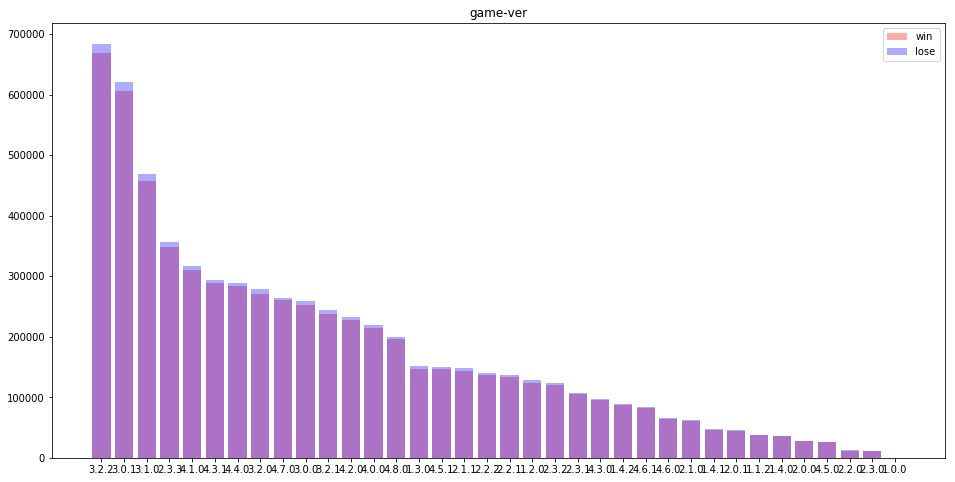

In [307]:
bar_plotter('game-ver')

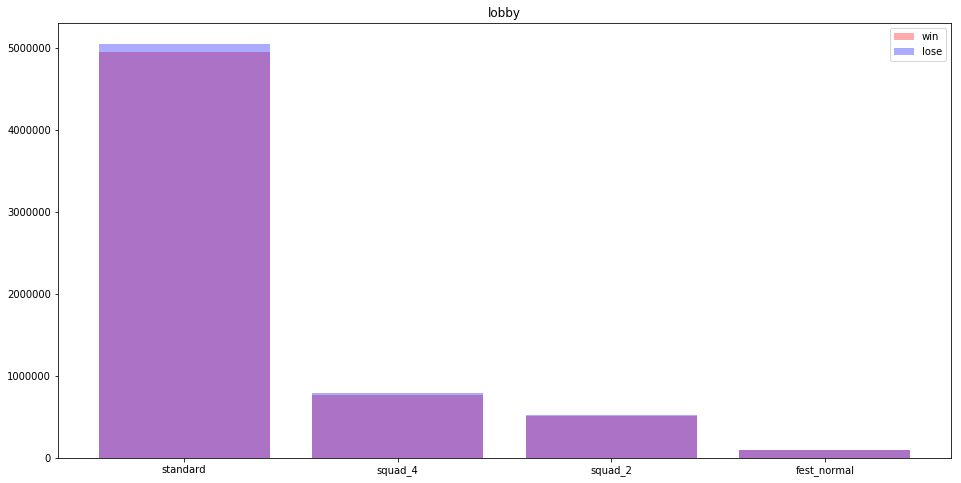

<Figure size 1152x576 with 0 Axes>

In [293]:
bar_plotter('lobby')

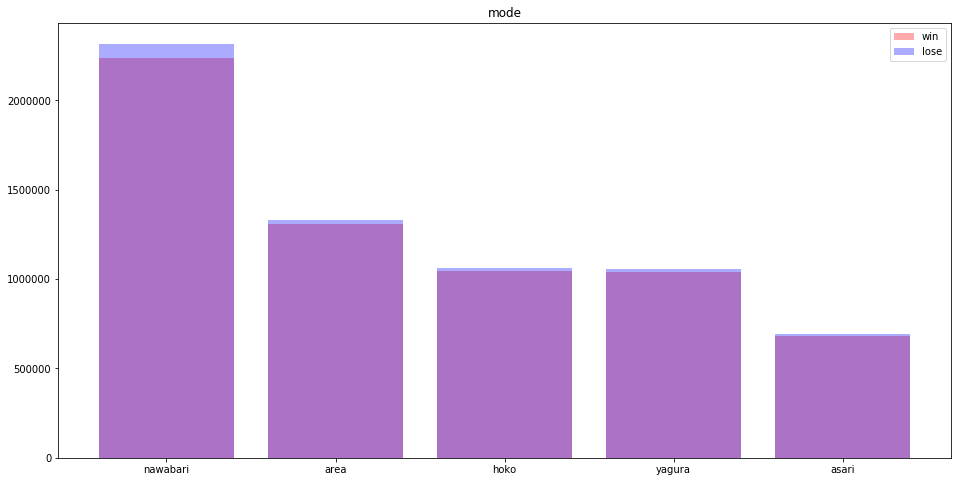

<Figure size 1152x576 with 0 Axes>

In [294]:
bar_plotter('mode')

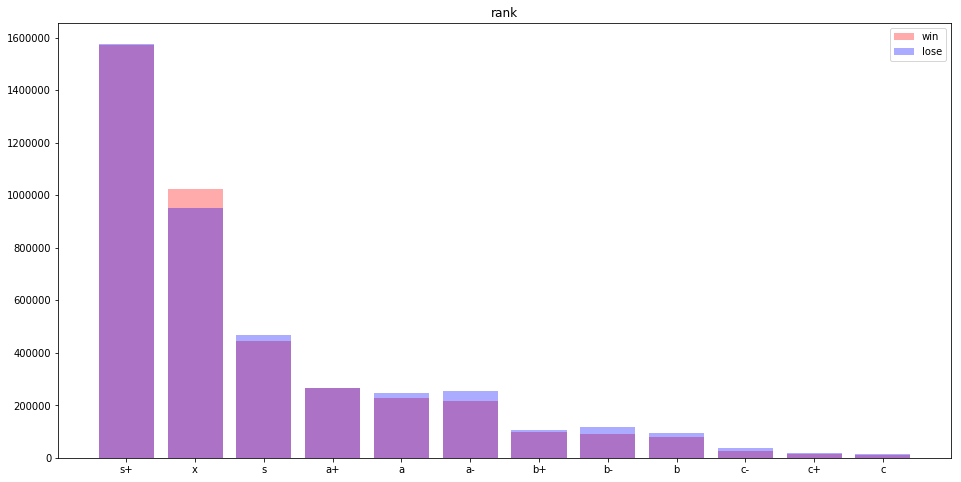

<Figure size 1152x576 with 0 Axes>

In [295]:
bar_plotter('rank')

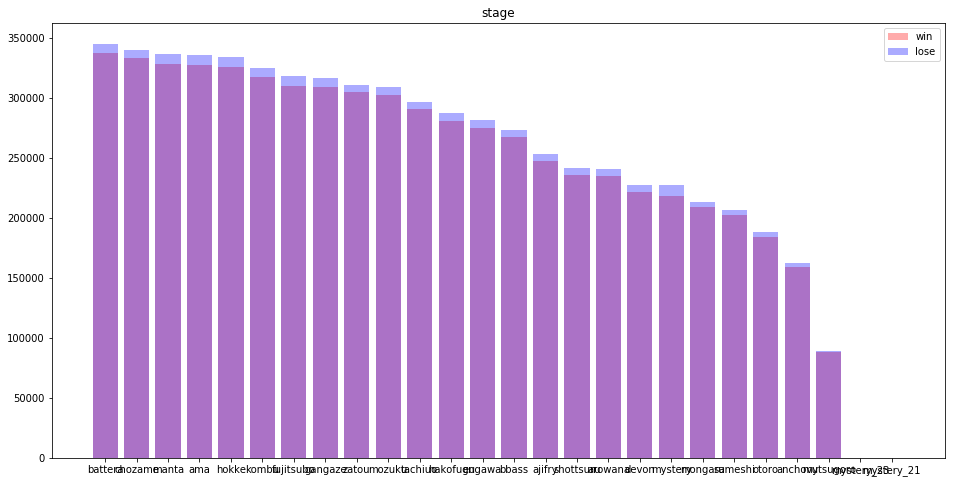

<Figure size 1152x576 with 0 Axes>

In [296]:
bar_plotter('stage')

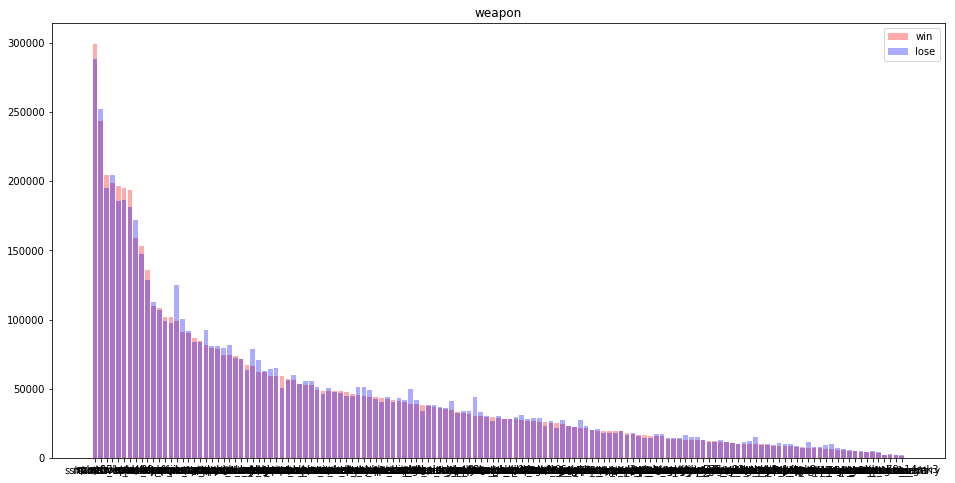

<Figure size 1152x576 with 0 Axes>

In [297]:
bar_plotter('weapon')

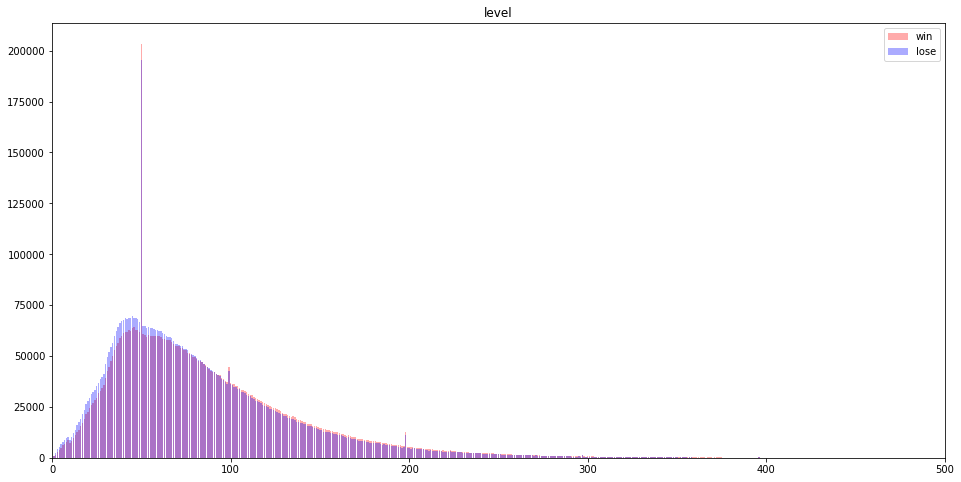

<Figure size 1152x576 with 0 Axes>

In [305]:
bar_plotter('level')

It is much more data than I need and very slow to work with so I will select only the most recent (based on game version) and work with that subset.

In [3]:
df['game-ver'].unique()

array(['4.2.0', '4.3.0', '4.3.1', '3.0.0', '1.3.0', '3.0.1', '4.4.0',
       '4.5.0', '4.5.1', '4.6.0', '4.6.1', '4.7.0', '2.2.2', '1.4.2',
       '2.0.0', '3.1.0', '3.2.0', '4.8.0', '3.2.1', '3.2.2', '1.1.2',
       '4.0.0', '4.1.0', '2.3.3', '2.3.2', '1.4.0', '2.2.1', '2.1.0',
       '2.1.1', '2.3.1', '1.4.1', '1.2.0', '2.2.0', '2.0.1', '2.3.0',
       '1.0.0'], dtype=object)

In [3]:
df = df[df['game-ver']=='4.8.0']
df.shape

(396655, 10)

40k is still plenty of features.

Break the dataframe into features and labels, then get dummies for the categorical features.

In [4]:
X = df[['mode', 'weapon', 'rank', 'level']]
y = df.win

In [5]:
X = pd.get_dummies(X)
X.shape

(396655, 157)

That created a lot of features but I have enough observations. Next to text various models.

In [313]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

### Logistic Regression

In [7]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.5163831103845008

### Random Forest

In [207]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5198896842555597

### Gradient Boosting

In [18]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.5175443287470302

### SGD

In [112]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.5110277546467833

### Neural Network

In [8]:
model = Sequential()
model.add(Dense(units=50, input_shape=(X_train.shape[1],)))
model.add(Activation('softmax'))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=100)

W0701 14:37:21.931227 4566181312 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 265758 samples
Epoch 1/5
265758/265758 [==============================] - 7s 25us/sample - loss: 0.6927 - accuracy: 0.5114
Epoch 2/5
265758/265758 [==============================] - 7s 25us/sample - loss: 0.6923 - accuracy: 0.5150
Epoch 3/5
265758/265758 [==============================] - 6s 24us/sample - loss: 0.6919 - accuracy: 0.5180
Epoch 4/5
265758/265758 [==============================] - 6s 23us/sample - loss: 0.6916 - accuracy: 0.5208s - los - ETA: 0s - loss: 0.6916 - accuracy
Epoch 5/5
265758/265758 [==============================] - 6s 23us/sample - loss: 0.6914 - accuracy: 0.5219


In [9]:
y_pred = model.predict_classes(X_test)
print(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.517658922664385 0.5247342478769523 0.27270342422418714


array([[50088, 16006],
       [47131, 17672]])

In [ ]:






''